In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
in_file='sales_data.csv'
df=pd.read_csv(in_file)
df

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [3]:
# Display the first few rows of the dataset to understand its structure

print(df.head())

         date     product     category   price  quantity  revenue
0  2022-01-01  Smartphone  Electronics   600.0      10.0   6000.0
1  2022-01-01      Laptop  Electronics  1200.0       5.0   6000.0
2  2022-01-02     T-Shirt     Clothing    20.0      50.0   1000.0
3  2022-01-03  Headphones  Electronics   100.0      20.0   2000.0
4  2022-01-04     T-Shirt     Clothing    20.0      25.0    500.0


In [4]:
# Check for missing values and handle them if necessary

print(df.isnull().sum())


date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64


In [5]:
# Handle missing values in 'price', 'quantity', 'revenue'

mean_price = df['price'].mean()
mean_quantity = df['quantity'].mean()
mean_revenue = df['revenue'].mean()

In [6]:
df['price'].fillna(mean_price, inplace=True)
df['quantity'].fillna(mean_quantity, inplace=True)
df['revenue'].fillna(mean_revenue, inplace=True)

In [7]:
# Verify that there are no more missing values

print(df.isnull().sum())

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64


In [8]:
# Convert the 'date' column to datetime type

df['date'] = pd.to_datetime(df['date'])


In [9]:
# Calculate total revenue generated by the company over the course of the year

total_revenue = df['revenue'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')


Total Revenue: $760390.68


In [10]:
# Identify the product with the highest revenue and the corresponding revenue

highest_revenue_product = df.loc[df['revenue'].idxmax()]
print(f'Highest Revenue Product: {highest_revenue_product["product"]}, Revenue: ${highest_revenue_product["revenue"]:.2f}')


Highest Revenue Product: Smartphone, Revenue: $7200.00


In [11]:
# Calculate the average price of a product sold by the company

average_price = df['price'].mean()
print(f'Average Price: ${average_price:.2f}')


Average Price: $211.23


In [12]:
# Calculate the total quantity of products sold by the company

total_quantity = df['quantity'].sum()
print(f'Total Quantity Sold: {total_quantity:.2f}')

Total Quantity Sold: 5374.57


In [13]:
# Identify the category with the highest revenue and the corresponding revenue

highest_revenue_category = df.groupby('category')['revenue'].sum().idxmax()
category_revenue = df.groupby('category')['revenue'].sum().max()
print(f'Highest Revenue Category: {highest_revenue_category}, Revenue: ${category_revenue:.2f}')

Highest Revenue Category: Electronics, Revenue: $516080.00


In [14]:
# Calculate the average revenue per sale

average_revenue_per_sale = df['revenue'].mean()
print(f'Average Revenue per Sale: ${average_revenue_per_sale:.2f}')

Average Revenue per Sale: $2060.68


In [15]:
# Calculate the total revenue generated in each quarter of the year

df['quarter'] = df['date'].dt.quarter
quarterly_revenue = df.groupby('quarter')['revenue'].sum()
print('Total Revenue in Each Quarter:')
print(quarterly_revenue.round(2))  # round to 2 decimal places

Total Revenue in Each Quarter:
quarter
1    182100.00
2    186030.68
3    197680.00
4    194580.00
Name: revenue, dtype: float64


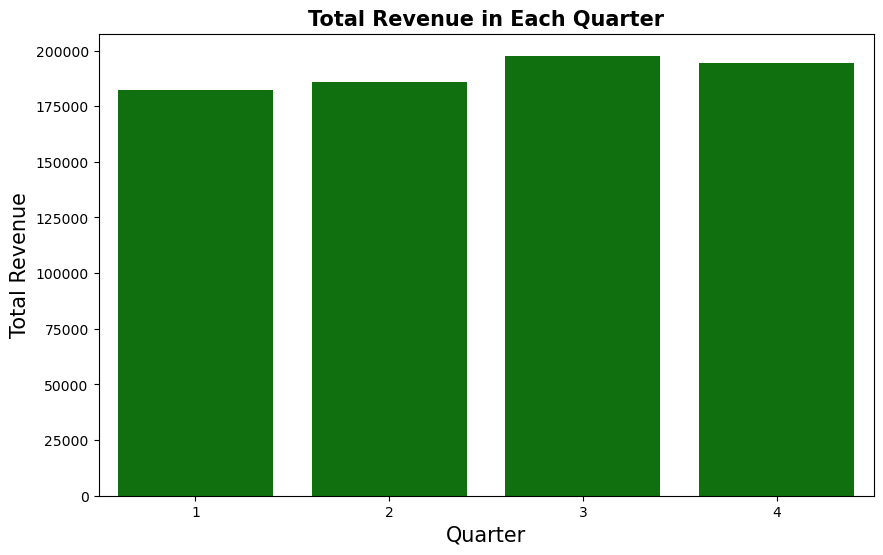

In [16]:
# Plot total revenue in each quarter using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=quarterly_revenue.index, y=quarterly_revenue.values, color='g')
plt.xlabel('Quarter',fontsize = '15')
plt.ylabel('Total Revenue', fontsize = '15')
plt.title('Total Revenue in Each Quarter', fontweight='bold',fontsize = '15')
plt.show()

ANSWERS TO ASSESSMENT QUESTIONS

1. What was the total revenue generated by the company over the course of the year?
ANS: $760390.68

2. Which product had the highest revenue? How much revenue did it generate?ANS: Highest Revenue Product: Smartphone, Revenue: $7200.00

3. What was the average price of a product sold by the company?
ANS: $211.23

4. What was the total quantity of products sold by the company?
ANS: 5374.57

5. Which category had the highest revenue? How much revenue did it generate?
ANS: Highest Revenue Category: Electronics, Revenue: $516080.00

6. What was the average revenue per sale?
ANS: $2060.68

7. What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)
ANS: Quarter
1    182100.00
2    186030.68
3    197680.00
4    194580.00



Here are some additional insights and observations that might be relevant based on the analysis:

1. Seasonal Trends: Analyzing the total revenue in each quarter allows you to identify potential seasonal trends in sales. For example, if the company sells products influenced by holidays or seasons, you may observe higher revenues in specific quarters.

2. Product Performance: The visualization of the product with the highest revenue provides insights into which product contributes significantly to the company's overall revenue. This information can be valuable for inventory management and marketing strategies.

3. Revenue by Category: Identifying the category with the highest revenue helps in understanding the company's revenue distribution across different product categories. This insight can guide strategic decisions related to product offerings and marketing focus.

4. Average Price and Quantity: Calculating the average price and total quantity sold provides a sense of the pricing strategy and product demand. A higher average price may indicate premium products, while a higher quantity sold may suggest popular and affordable items.

5. Revenue Per Sale: Understanding the average revenue per sale gives an indication of the overall profitability of each transaction. It helps in assessing the effectiveness of pricing and sales strategies.

6. Handling Missing Values: Addressing missing values in 'price', 'quantity', and 'revenue' ensures the accuracy of the analysis. The chosen approach, such as replacing missing values with mean values, may impact the results, and alternative methods could be explored based on the nature of the data.

7. Visualizations: The use of visualizations, whether with matplotlib or seaborn, enhances the interpretability of the analysis. Bar charts are effective for comparing values across categories, and adjusting colors and styles can improve the visual appeal.

8. Data Cleaning: Ensuring data integrity through steps like converting the 'date' column to datetime type is crucial. Clean data contributes to reliable analysis and prevents errors in calculations.

